<a href="https://colab.research.google.com/github/ManmathNath/Ml-Codebasics/blob/main/Multiple_Regression_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=05c2be4d22b03ee5e75640920809c7e454f23fb2ed4d0c69c788e8a27aa346f8
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
df=pd.read_csv("hiring.csv")
df
#df.isnull()
df.experience=df["experience"].fillna("zero")
df
#1st fill the na functions,then convert word to number otherwise the strings of the word column doesn't convert to number
df.experience= df['experience'].apply(w2n.word_to_num)
df
import math
median_testscore=math.floor(df["test_score(out of 10)"].median())
median_testscore
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(median_testscore)
df
#median_test_score = math.floor(df['test_score(out of 10)'].median())
#median_test_score
#df["test_score(out of 10)"]= df["test_score(out of 10)"].fillna(median_test_score)
#df
reg=linear_model.LinearRegression()
reg
reg.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df["salary($)"])
# find 2yr experience, 9 test score,6 interview_score and 10,12 12
#reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
reg.predict([[10,12,12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94478.16593886])

In [ ]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
reg.intercept_

17737.263464337688

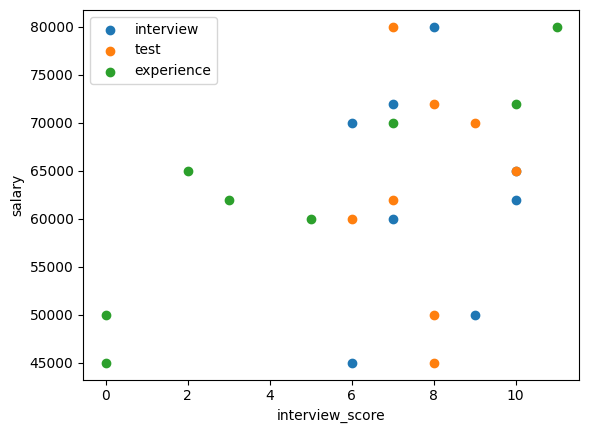

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df["interview_score(out of 10)"],df['salary($)'],label="interview")
plt.scatter(df["test_score(out of 10)"],df['salary($)'],label="test")
plt.scatter(df["experience"],df['salary($)'],label="experience")
plt.xlabel("interview_score")
plt.ylabel("salary")
plt.legend()
plt.show()